# Week 1 Assignment


# Signal Representation and Sampling

1) Generate a sine wave of frequency 10 Hz with:
Duration = 2seconds and
Sampling rate = 500 Hz.

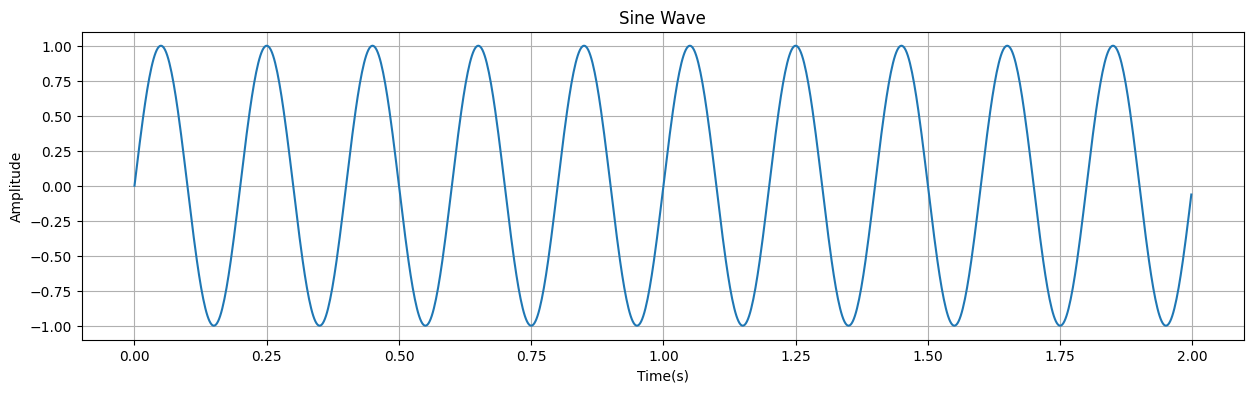

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 5
duration = 2.0
sampling_rate = 500

time_continuous = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave_continuous = np.sin(2 * np.pi * frequency * time_continuous)

plt.figure(figsize=(15, 4))
plt.plot(time_continuous,sine_wave_continuous)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

2) Plot the continuous signal and a discretized version sampled at 40 Hz.

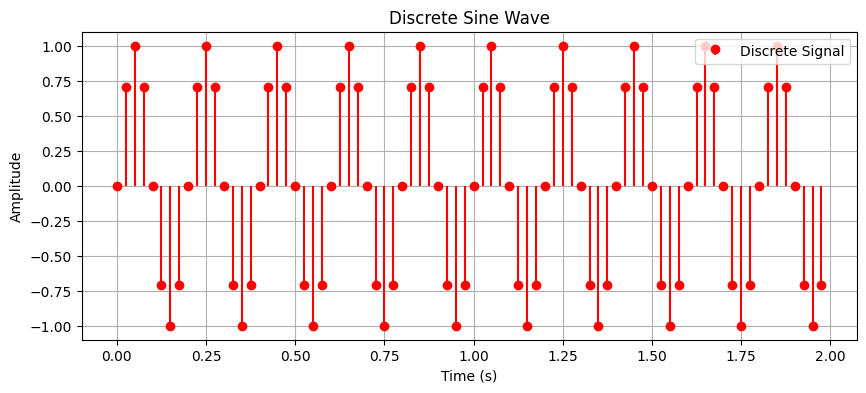

In [ ]:
sampling_rate_discrete = 40  # Lower sampling rate for discrete signal
time_discrete = np.linspace(0, duration, int(sampling_rate_discrete * duration), endpoint=False)
sine_wave_discrete = np.sin(2 * np.pi * frequency * time_discrete)

# Plot discrete sine wave
plt.figure(figsize=(10, 4))
plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
plt.title("Discrete Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

3) Experiment: Vary the sampling rate (e.g., 20 Hz, 50 Hz, 100 Hz) and observe the effect on the discrete signal.


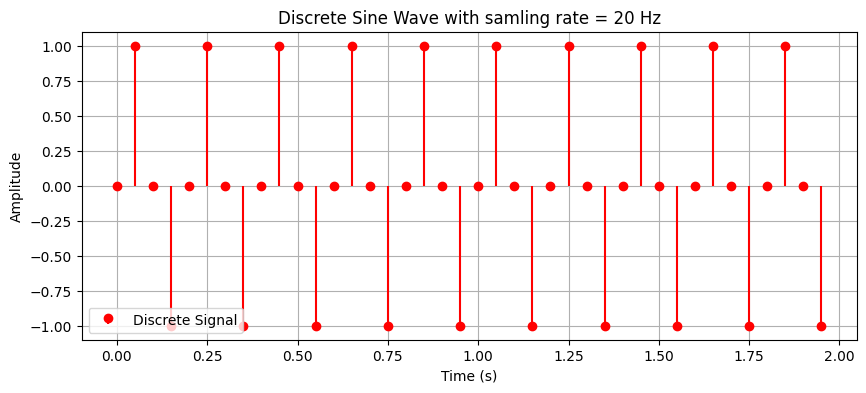

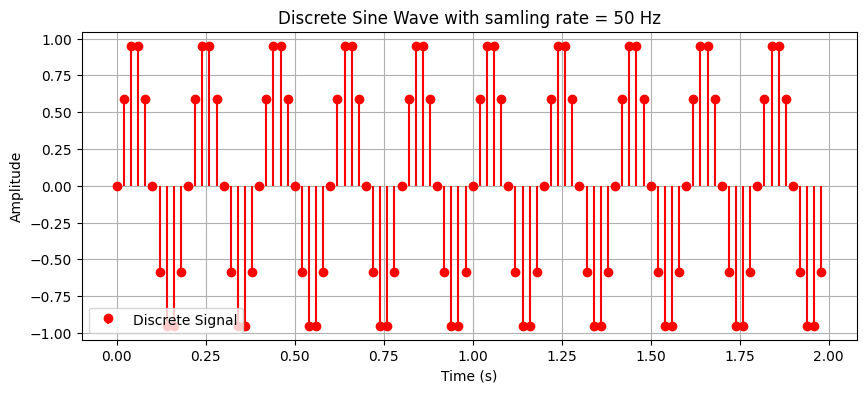

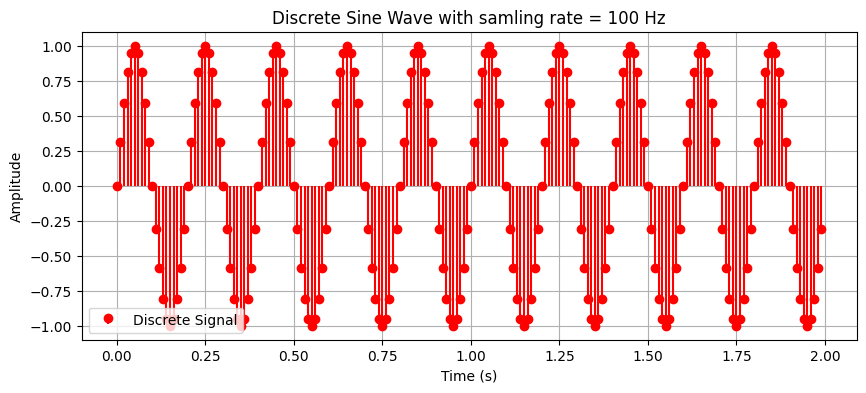

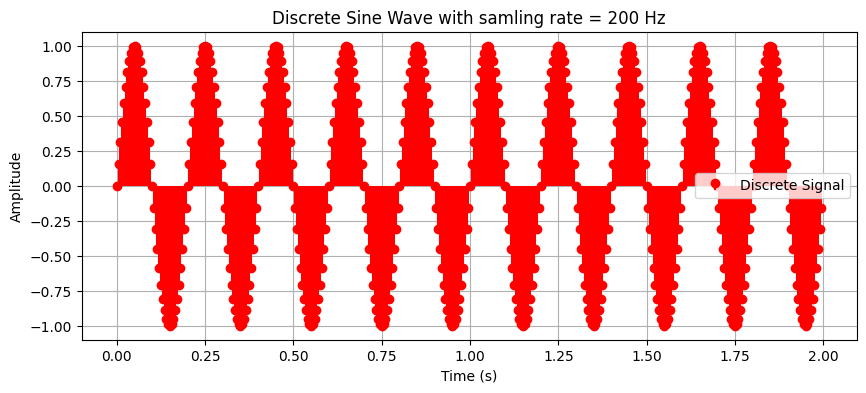

In [ ]:
sampling_rate_discrete = [20,50,100,200]

for i in range (len(sampling_rate_discrete)):
    time_discrete = np.linspace(0, duration, int(sampling_rate_discrete[i] * duration), endpoint=False)
    sine_wave_discrete = np.sin(2 * np.pi * frequency * time_discrete)

# Plot discrete sine wave
    plt.figure(figsize=(10, 4))
    plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
    plt.title("Discrete Sine Wave with samling rate = {} Hz".format(sampling_rate_discrete[i]))
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()


# Fourier Transform and Frequency Domain Analysis

1) Generate a composite signal by summing two sine waves with frequencies 5 Hz and 20 Hz.

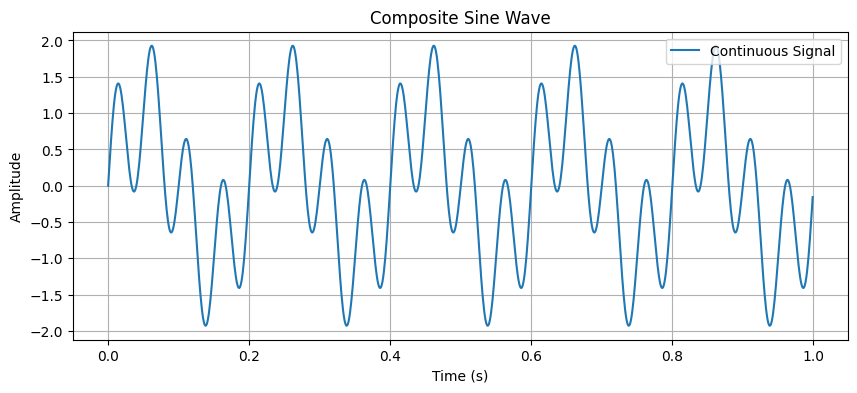

In [ ]:
f1 = 5
f2 = 20
duration = 1.0
sampling_rate_continuous = 1000

time_continuous = np.linspace(0, duration, int(sampling_rate_continuous * duration), endpoint=False)
sine1 = np.sin(2 * np.pi * f1 * time_continuous)
sine2 = np.sin(2 * np.pi * f2 * time_continuous)

# Plot continuous sine wave
plt.figure(figsize=(10, 4))
plt.plot(time_continuous, sine1 + sine2, label="Continuous Signal")
plt.title("Composite Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

2) Perform the Fourier Transform (FT) on the composite signal,
plot the magnitude spectrum and identify the prominent frequency components.

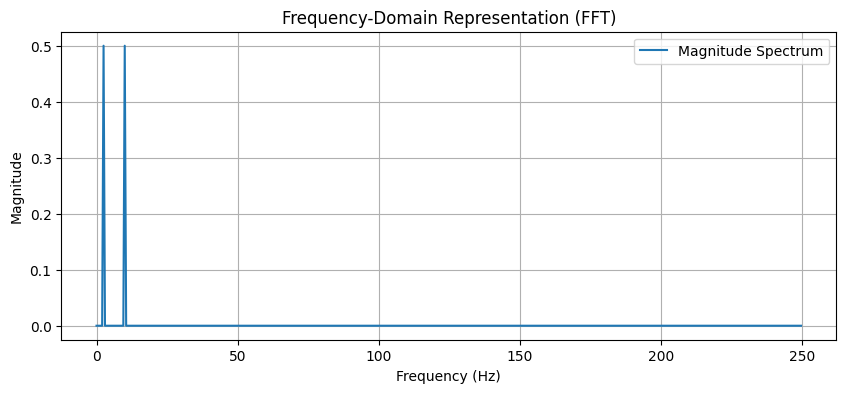

In [ ]:
composite_wave = sine1 + sine2

n = len(composite_wave)
fft_values = np.fft.fft(composite_wave)
frequency_axis = np.fft.fftfreq(n, 1 / sampling_rate)

positive_freqs = frequency_axis[:n // 2]
magnitude_spectrum = np.abs(fft_values[:n // 2]) / n

plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude_spectrum, label="Magnitude Spectrum")
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Audio Signal Analysis

1) Upload like 5 audio but belonging to the same category, like animals, music instruments and stuff (e.g.wav or .mp3) and load it using librosa.

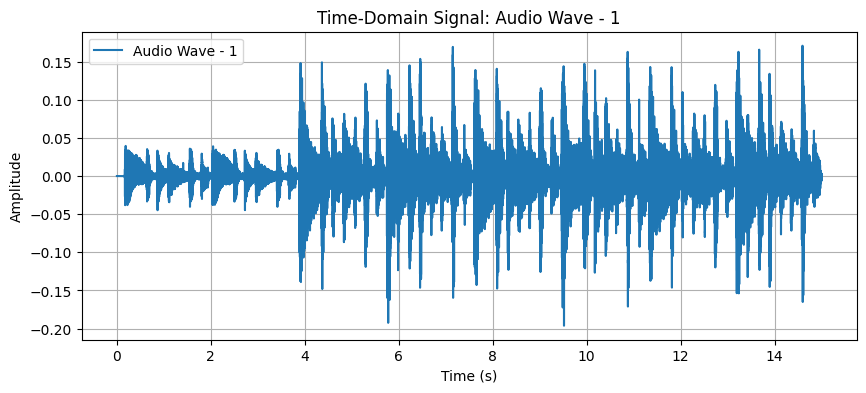

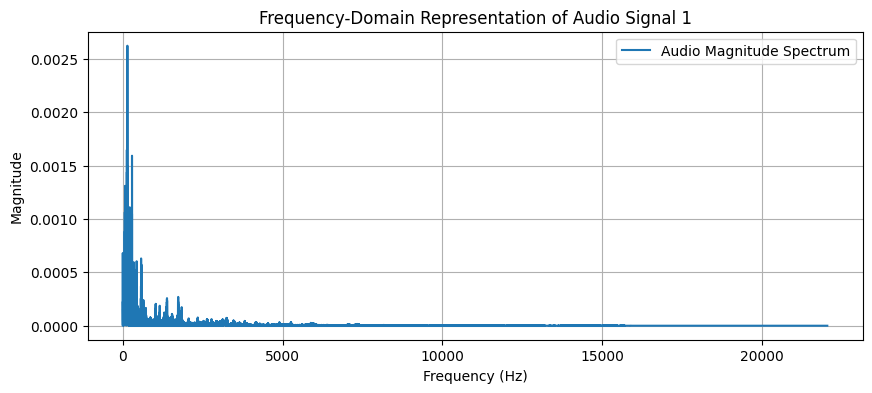

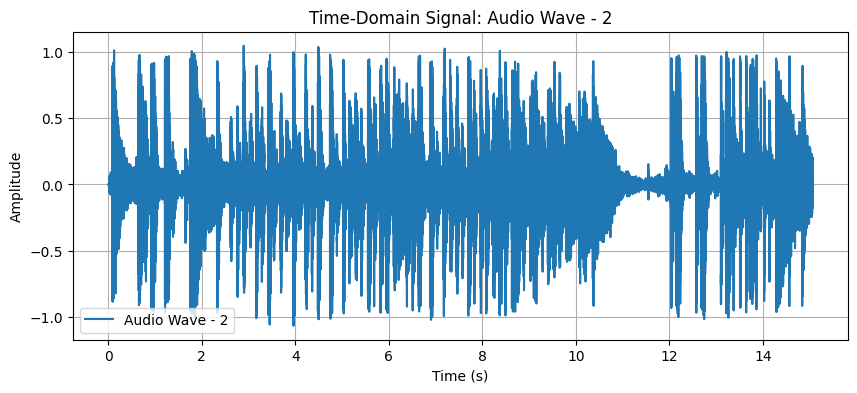

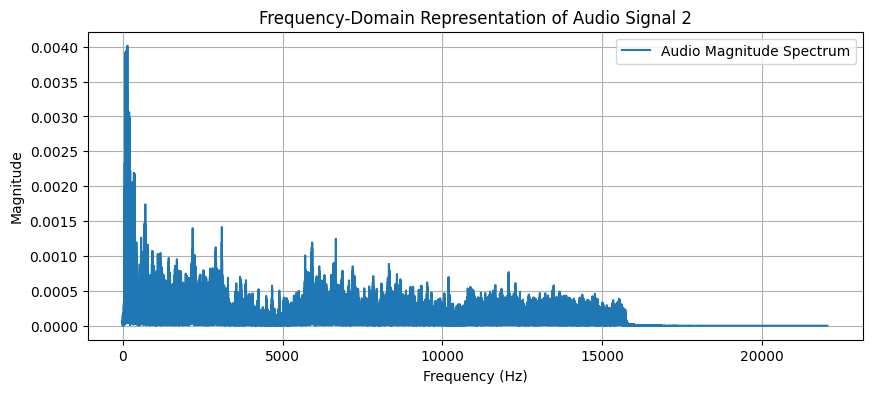

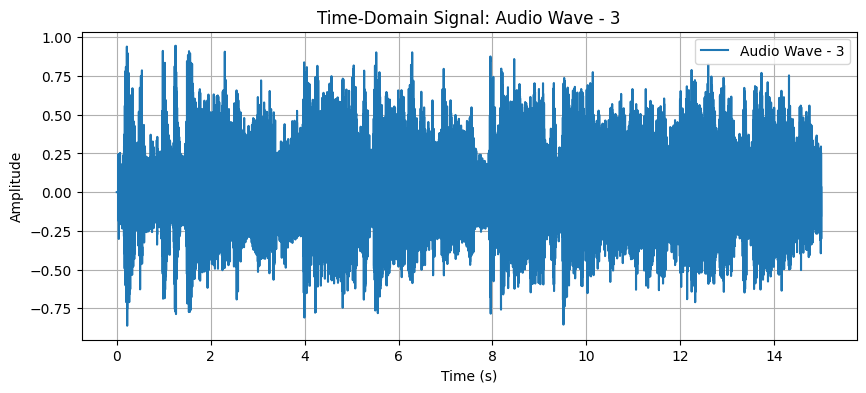

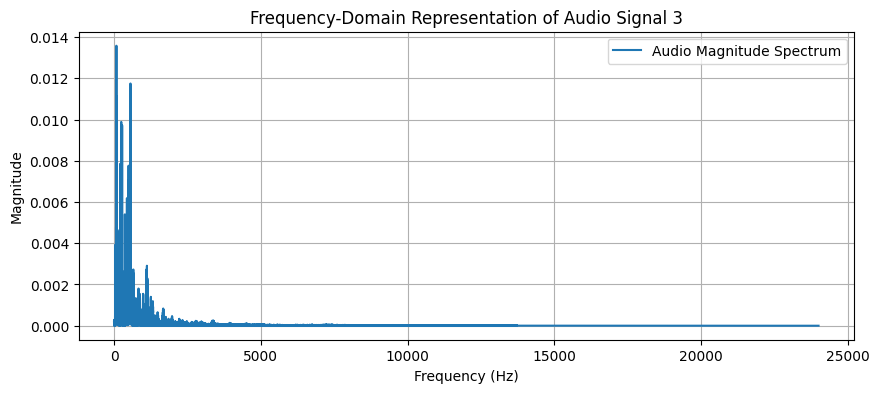

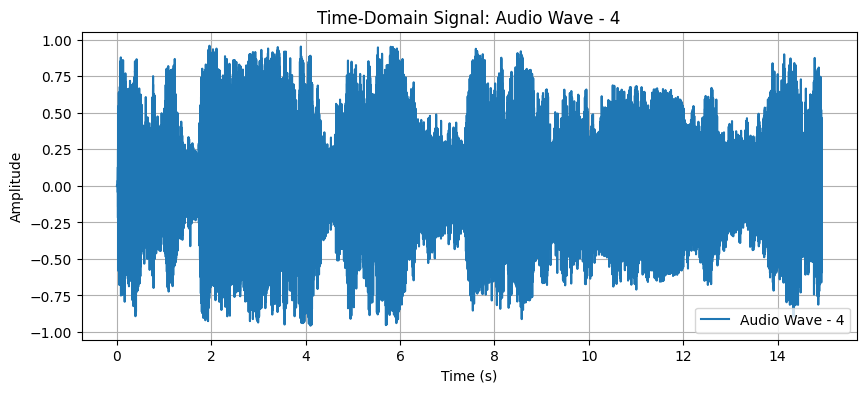

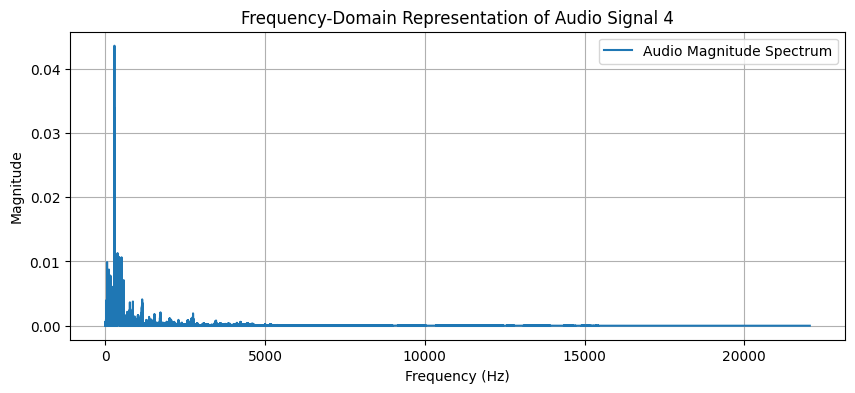

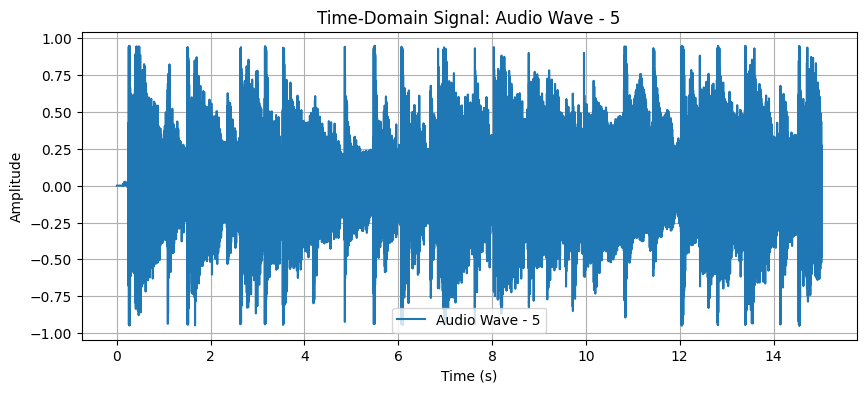

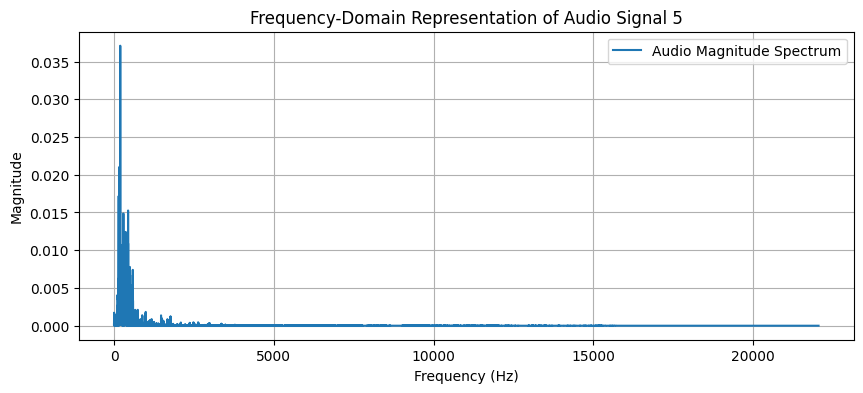

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

audio_file_path = ['/content/drive/MyDrive/Audionet/Assignment_1/Xylophone_1.mp3','/content/drive/MyDrive/Audionet/Assignment_1/Drums_1.mp3','/content/drive/MyDrive/Audionet/Assignment_1/Flute_1.mp3','/content/drive/MyDrive/Audionet/Assignment_1/Violin_1.mp3','/content/drive/MyDrive/Audionet/Assignment_1/Guitar_1.mp3' ]
for i in range(len(audio_file_path)):
    audio_signal, sr = librosa.load(audio_file_path[i], sr=None)

    n_audio = len(audio_signal)
    fft_audio = np.fft.fft(audio_signal)
    frequency_axis_audio = np.fft.fftfreq(n_audio, 1 / sr)
    time = np.linspace(0, n_audio / sr, num=n_audio)

    positive_freqs_audio = frequency_axis_audio[:n_audio // 2]
    magnitude_spectrum_audio = np.abs(fft_audio[:n_audio // 2]) / n_audio

    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_signal , label="Audio Wave - {}".format(i+1))
    plt.title("Time-Domain Signal: Audio Wave - {}".format(i+1))
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs_audio, magnitude_spectrum_audio, label="Audio Magnitude Spectrum")
    plt.title("Frequency-Domain Representation of Audio Signal {}".format(i+1))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()
    plt.show()

2) Plot the waveform of the audio signal.

In [ ]:
# waveform plotted in the above result

3) Perform the Fourier Transform (FT) and plot the magnitude spectrum.

In [ ]:
# Magnitude specturm plotted in the above result

4) Compute and visualize the STFT for the audio signal using scipy.signal.stft.

Experiment with different window sizes (e.g., 256, 1024, 4096).
Discuss the trade-off between time and frequency resolution.

In [8]:
from scipy.signal import stft
import librosa
import librosa.display

for i in range(len(audio_file_path)):
    audio_signal, sr = librosa.load(audio_file_path[i], sr=None)
    print(f"Audio signal {i} length: {len(audio_signal)} samples, Sampling rate: {sr} Hz")
    window_sizes = [256, 1024, 4096]
    plt.figure(figsize=(15, 10))
    for i, window_size in enumerate(window_sizes, 1):
        f, t, Zxx = stft(audio_signal, fs=sr, nperseg=window_size)  # Compute STFT

        # Magnitude spectrum
        magnitude = np.abs(Zxx)

        # Plot STFT magnitude
        plt.subplot(len(window_sizes), 1, i)
        plt.pcolormesh(t, f, 20 * np.log10(magnitude), shading='gouraud')  # Log scale for better visualization
        plt.title(f"STFT Magnitude Spectrum (Window Size: {window_size})")
        plt.ylabel("Frequency (Hz)")
        plt.xlabel("Time (s)")
        plt.colorbar(label="Magnitude (dB)")

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Spectrogram Visualization

1) Create spectrogram for the audio files uploaded  using librosa.display.specshow.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

audio_file_path = [
    '/content/drive/MyDrive/Audionet/Assignment_1/Xylophone_1.mp3',
    '/content/drive/MyDrive/Audionet/Assignment_1/Drums_1.mp3',
    '/content/drive/MyDrive/Audionet/Assignment_1/Flute_1.mp3',
    '/content/drive/MyDrive/Audionet/Assignment_1/Violin_1.mp3',
    '/content/drive/MyDrive/Audionet/Assignment_1/Guitar_1.mp3'
]


for i in range(len(audio_file_path)):
    audio_signal, sr = librosa.load(audio_file_path[i], sr=None)
    print(f"Audio signal {i+1} length: {len(audio_signal)} samples, Sampling rate: {sr} Hz")

    stft_result = librosa.stft(audio_signal, n_fft=1024, hop_length=512, win_length=1024)
    stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis='time', y_axis='hz', cmap='viridis')
    plt.colorbar(format="%+2.0f dB", label="Magnitude (dB)")
    plt.title(f"Spectrogram for Audio File {i+1}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

2) Experiment with
logarithmic scaling for frequency and
different color maps for better visualization.

In [10]:
n_fft = 1024
hop_length = 512
color_maps = ['viridis', 'plasma', 'magma', 'cividis']

for i in range(len(audio_file_path)):

    audio_signal, sr = librosa.load(audio_file_path[i], sr=None)
    print(f"Audio signal {i+1} length: {len(audio_signal)} samples, Sampling rate: {sr} Hz")

    stft_result = librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length)
    stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

    plt.figure(figsize=(15, 8))
    for j, cmap in enumerate(color_maps):
        plt.subplot(2, 2, j + 1)
        librosa.display.specshow(
            stft_db,
            sr=sr,
            hop_length=hop_length,
            x_axis='time',
            y_axis='log',  # Logarithmic frequency scale
            cmap=cmap  # Apply color map
        )
        plt.colorbar(format="%+2.0f dB", label="Magnitude (dB)")
        plt.title(f"Spectrogram (Log-Frequency, Color Map: {cmap})")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

3) Discuss how the spectrogram helps visualize frequency changes over time.

In [ ]:
# Spectrogram helps us in visualising how frequency distribution changes over time. For the example of musical instruments taken above, as we know when a particular string of guitar is pluck or a particular bar of xylophone is struck it gives an audio signal of that particular frequency for a short time and in then is subsided in the other music. In normal fourier transform this leads to a small denotion of amplitude for that frequency , but in spectrogram this helps us notice which particular notes or frequencies are produced during which time periods as the amplitudes can now be seen with an amplitude more than that produced during a reugular fourier transform.

# Quantization

1) Simulate a 50 Hz sine wave sampled at 1000 Hz.

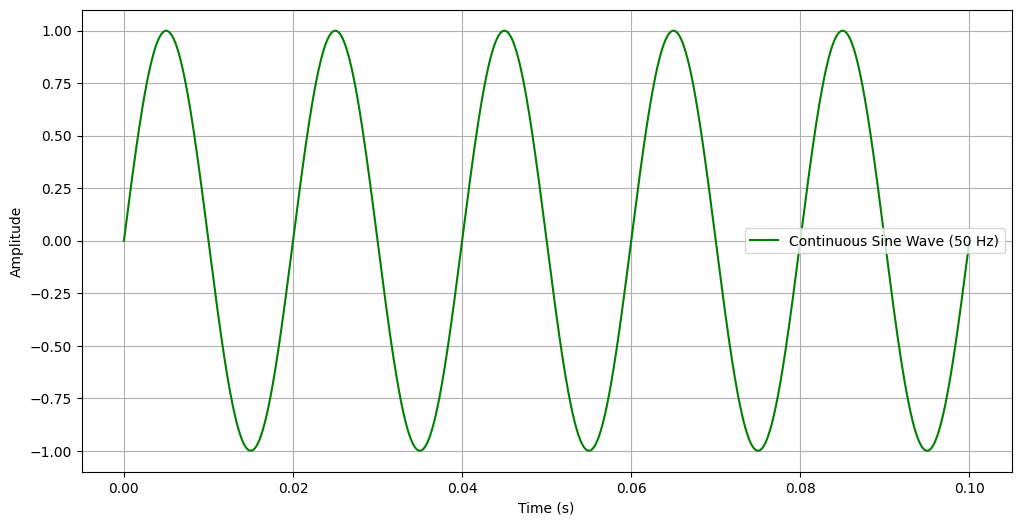

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

signal_freq = 50
sampling_rate = 1000
duration = 0.1

time_continuous = np.linspace(0, duration, 10000)
signal_continuous = np.sin(2 * np.pi * signal_freq * time_continuous)

plt.figure(figsize=(12, 6))
plt.plot(time_continuous, signal_continuous, label="Continuous Sine Wave (50 Hz)", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

2) Quantize the signal with different bit depths (e.g., 8-bit, 4-bit).

In [ ]:
time_quantized = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal_quantized = np.sin(2 * np.pi * signal_freq * time_quantized)

bit_depths = [8, 4]
quantized_signals = {}

for bit_depth in bit_depths:
    step_size = 2 / (2 ** bit_depth)
    quantized_signal = np.round(signal_quantized / step_size) * step_size
    quantized_signals[bit_depth] = quantized_signal


3) Plot and compare
the original signal and the
quantized signals for each bit depth.

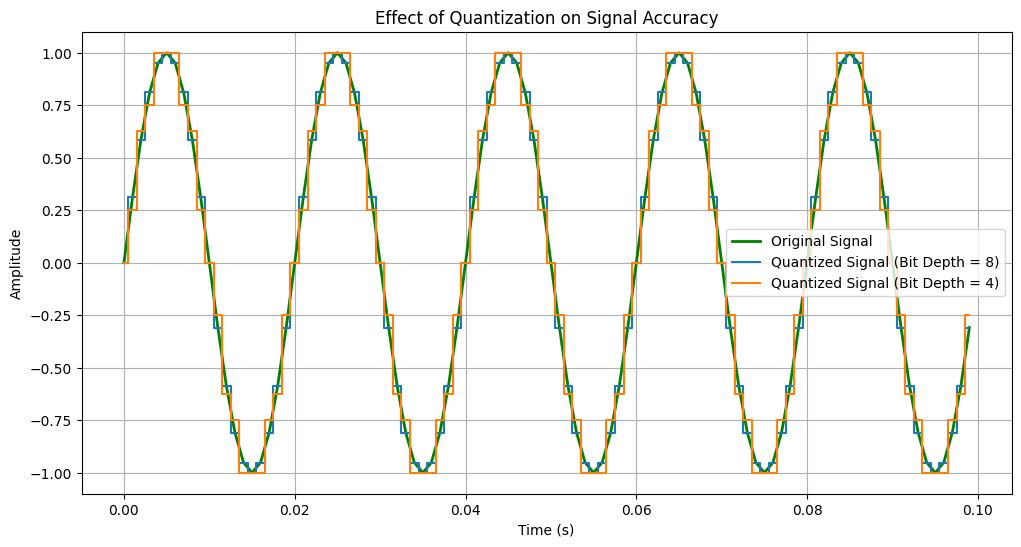

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_quantized, signal_quantized, label="Original Signal", color='green', lw=2)

for bit_depth, quantized_signal in quantized_signals.items():
    plt.step(time_quantized, quantized_signal, label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid')

plt.title("Effect of Quantization on Signal Accuracy")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()